In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
mtcars = pd.read_csv('data/mtcars.csv')  
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
mtcars = mtcars.rename(columns={'Unnamed: 0':'Model'})

In [4]:
mtcars[0:1]

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4


In [5]:
mtcars.index = mtcars.Model

In [6]:
del mtcars["Model"]

In [7]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [12]:
mtcars.mean(axis=0)
# mtcars.mean(axis=1) # row wise mean

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [13]:
mtcars['mpg'].mean()

20.090625000000003

In [14]:
mtcars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

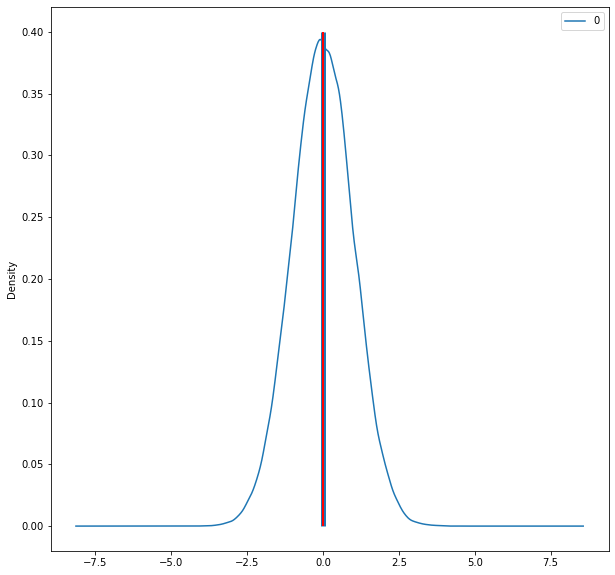

In [17]:
norm_data = pd.DataFrame(np.random.normal(size=100000)) # generates a df of 100000 records

norm_data.plot(kind='density',
               figsize=(10,10))

plt.vlines(norm_data.mean(),
            ymin=0,
            ymax=0.4,
            linewidth=5.0)

plt.vlines(norm_data.median(),
            ymin=0,
            ymax=0.4,
            linewidth=2.0,
            color='r')


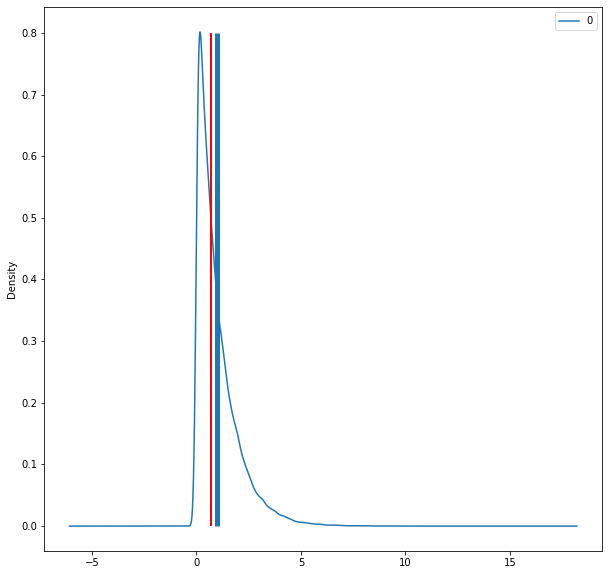

In [22]:
skewed_data= pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind='density',
               figsize=(10,10))

plt.vlines(skewed_data.mean(),
            ymin=0,
            ymax=0.8,
            linewidth=5.0)

plt.vlines(skewed_data.median(),
            ymin=0,
            ymax=0.8,
            linewidth=2.0,
            color='r')



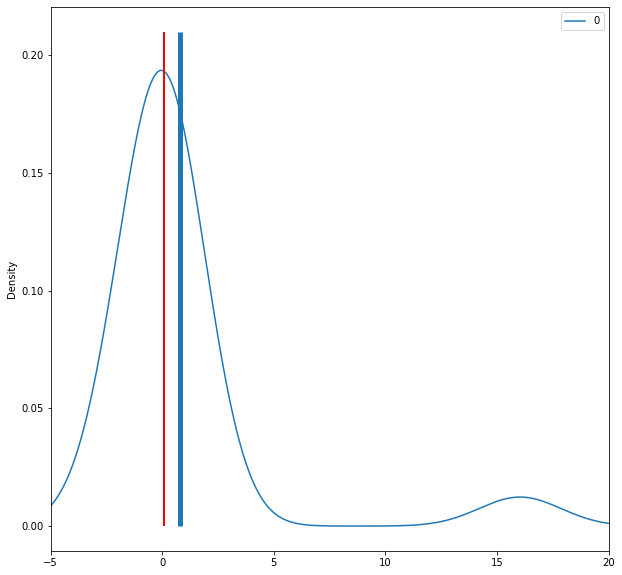

In [30]:
norm_data=np.random.normal(size=50)
outliers=np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers),axis=0))

combined_data.plot(kind='density',
                figsize=(10,10),
                xlim=(-5,20))

plt.vlines(combined_data.mean(),
            ymin=0,
            ymax=0.21,
            linewidth=5.0)

plt.vlines(combined_data.median(),
            ymin=0,
            ymax=0.21,
            linewidth=2.0,
            color='r')

In [36]:
mtcars.mode(axis=0) # returns the mode of each column 
# some columns have multiple values occuring twice eg: mpg
# which is why some columns have multiple modes

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Measures of Spread

In [38]:
mtcars['mpg'].max() - mtcars['mpg'].min()

23.5

In [39]:
five_num = [mtcars['mpg'].quantile(0),
            mtcars['mpg'].quantile(0.25),
            mtcars['mpg'].quantile(0.5),
            mtcars['mpg'].quantile(0.75),
            mtcars['mpg'].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Text(0.65, 19.5, 'IQR')

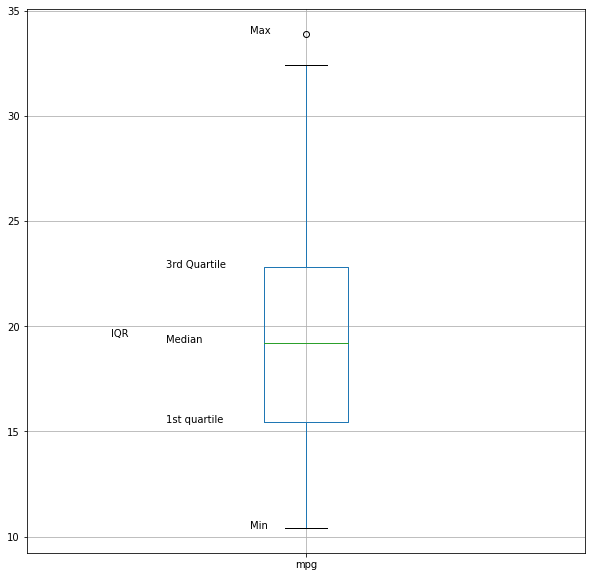

In [42]:
mtcars.boxplot(column='mpg',
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.75, y=22.8, s="3rd Quartile")
plt.text(x=0.75, y=19.2, s="Median")
plt.text(x=0.75, y=15.4, s="1st quartile")
plt.text(x=0.9, y=10.4,  s="Min")
plt.text(x=0.9, y=33.9, s="Max")
plt.text(x=0.65, y=19.5, s="IQR")


In [43]:
mtcars['mpg'].var()

36.32410282258064

In [44]:
mtcars['mpg'].std()

6.026948052089104

In [46]:
mtcars['mpg'].skew() 
# -ve is right skwed, +ve is left skewed

0.6723771376290805

In [49]:
mtcars['mpg'].kurt() 
# -ve tells us that there are less distribution of data points in the tail of the 
# positively skewed distribution

-0.0220062914240855

/home/avyay/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

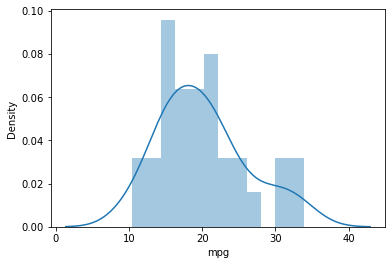

In [63]:
import seaborn as sns

sns.distplot(mtcars['mpg'],kde = True, bins = 12)

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


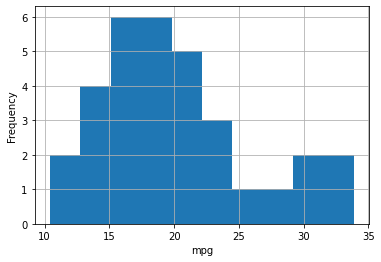

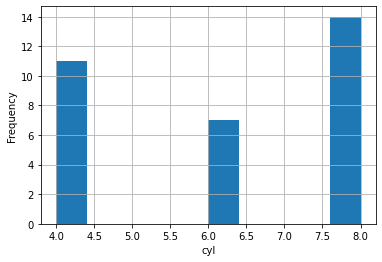

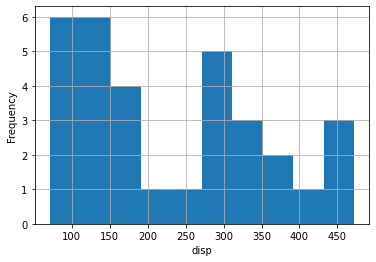

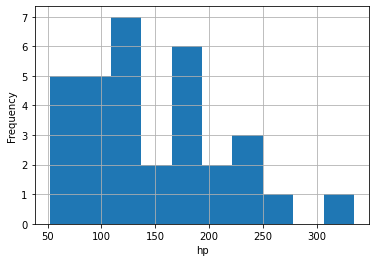

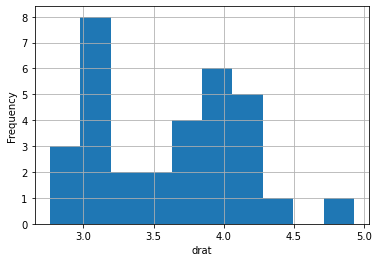

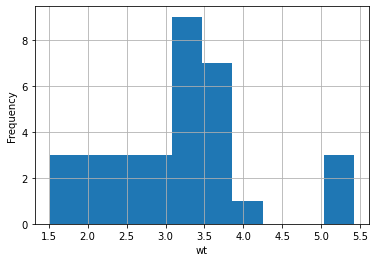

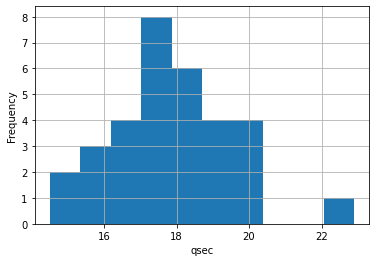

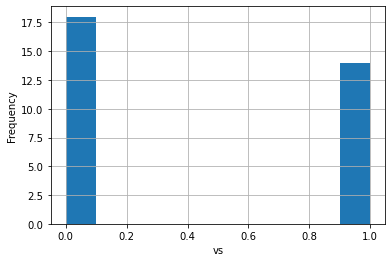

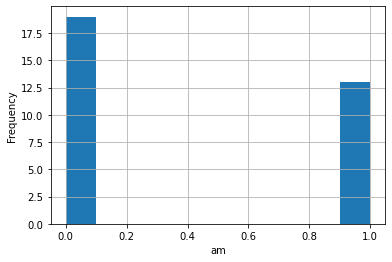

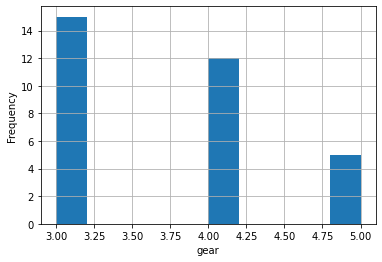

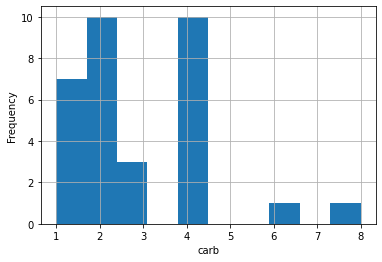

In [65]:
numerical_features = [feature for feature in mtcars.columns if mtcars[feature].dtypes!='objects']
print(numerical_features)

for feature in numerical_features:
    if feature=='class(target)':
        continue
    else:
        mtcars[feature].hist()
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Another Example

In [66]:
df = sns.load_dataset('tips')

In [68]:
df.shape

(244, 7)

In [69]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [70]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [71]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
result = df[df['tip']==2.00][df['sex']=='Male']

/tmp/ipykernel_169082/3152600763.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = df[df['tip']==2.00][df['sex']=='Male']


In [73]:
print(result)

     total_bill  tip   sex smoker   day    time  size
6          8.77  2.0  Male     No   Sun  Dinner     2
26        13.37  2.0  Male     No   Sat  Dinner     2
27        12.69  2.0  Male     No   Sat  Dinner     2
36        16.31  2.0  Male     No   Sat  Dinner     3
61        13.81  2.0  Male    Yes   Sat  Dinner     2
86        13.03  2.0  Male     No  Thur   Lunch     2
123       15.95  2.0  Male     No  Thur   Lunch     2
138       16.00  2.0  Male    Yes  Thur   Lunch     2
149        7.51  2.0  Male     No  Thur   Lunch     2
151       13.13  2.0  Male     No   Sun  Dinner     2
153       24.55  2.0  Male     No   Sun  Dinner     4
154       19.77  2.0  Male     No   Sun  Dinner     4
159       16.49  2.0  Male     No   Sun  Dinner     4
163       13.81  2.0  Male     No   Sun  Dinner     2
176       17.89  2.0  Male    Yes   Sun  Dinner     2
177       14.48  2.0  Male    Yes   Sun  Dinner     2
187       30.46  2.0  Male    Yes   Sun  Dinner     5
196       10.34  2.0  Male  

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [77]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


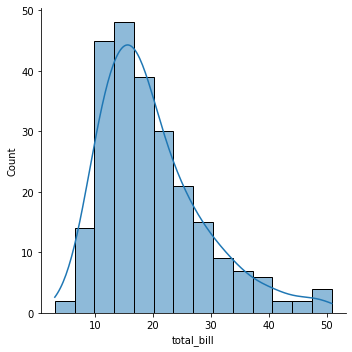

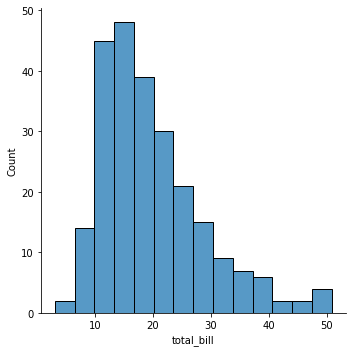

In [81]:
# Lets perform a univarient analsis

sns.displot(df['total_bill'], kde=True)
# sns.displot(df['total_bill'], kde=False)

<AxesSubplot:xlabel='sex', ylabel='count'>

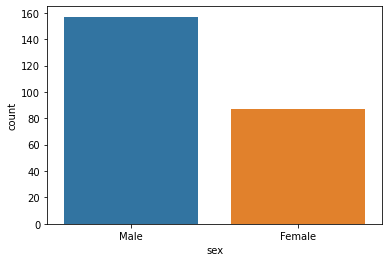

In [82]:
# count the number of male and female diners

sns.countplot(x='sex', data= df)

<AxesSubplot:xlabel='day', ylabel='count'>

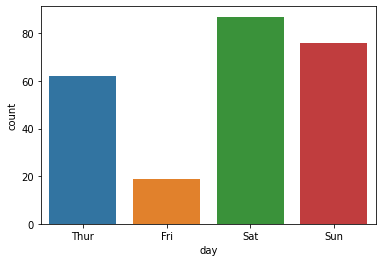

In [83]:
#busiest days of the week

sns.countplot(x='day',data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

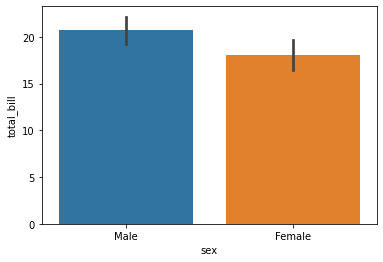

In [84]:
# Bivarient Analysis

sns.barplot(x='sex',y='total_bill',data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

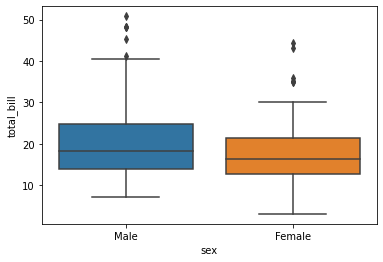

In [85]:
sns.boxplot(x='sex',y='total_bill',data = df)

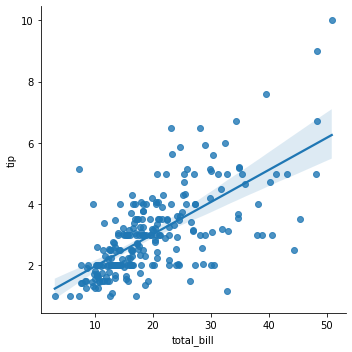

In [86]:
# Regression plot

sns.lmplot(x='total_bill',y='tip',data=df)

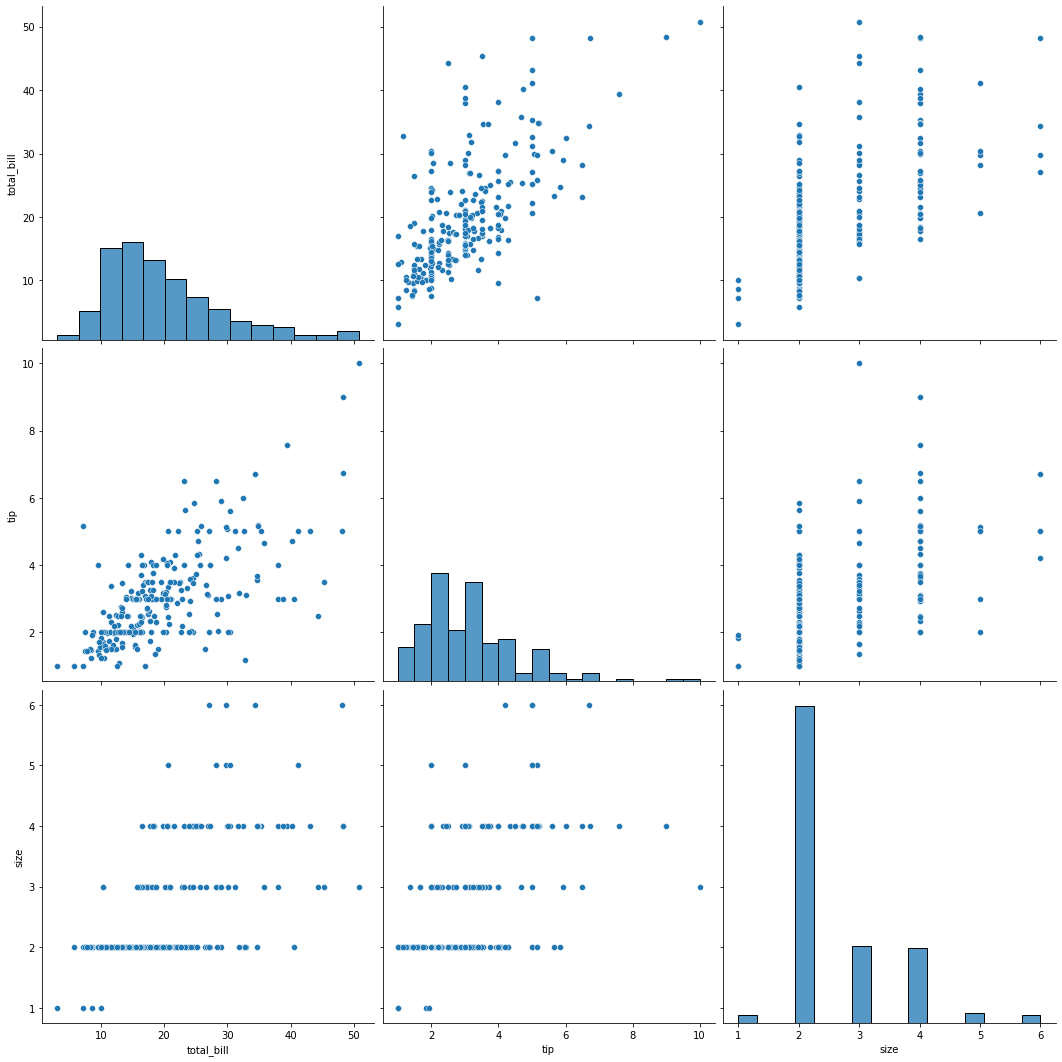

In [95]:
# Multivarient analysis

sns.pairplot(df,height=5)